In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
img_dir = r"e:\William\image_export"
mask_dir = r"e:\William\segmentation_export"

In [2]:
import joblib

In [3]:
model = joblib.load("models/model4.pk1")
model

UNet(
  (down_conv1): DownBlock(
    (double_conv): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (down_sample): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (down_conv2): DownBlock(
    (double_conv): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      

In [ ]:
small_img = cv2.

In [4]:
img_files = os.listdir(img_dir)
mask_files = os.listdir(mask_dir)


In [5]:
imgs = []
masks = []
for i in range(len(img_files)):
    img_f = img_files[i]
    mask_f = mask_files[i]
    mask = cv2.imread(os.path.join(mask_dir, mask_f))
    # if mask has > 2 classes
    if (len(np.unique(mask))>1):
        print(np.unique(mask))
        img = cv2.imread(os.path.join(img_dir, img_f))
        mask[mask > 1] = 0
        imgs.append(img)
        masks.append(mask)
        print(f"Checked {i} out of {len(img_files)}")

Checked 46 out of 18018
Checked 47 out of 18018
Checked 126 out of 18018
Checked 165 out of 18018
Checked 166 out of 18018
Checked 167 out of 18018
Checked 169 out of 18018
Checked 172 out of 18018
Checked 750 out of 18018
Checked 751 out of 18018
Checked 788 out of 18018
Checked 789 out of 18018
Checked 790 out of 18018
Checked 826 out of 18018
Checked 827 out of 18018
Checked 828 out of 18018
Checked 904 out of 18018
Checked 905 out of 18018
Checked 984 out of 18018
Checked 1023 out of 18018
Checked 1024 out of 18018
Checked 1025 out of 18018
Checked 1027 out of 18018
Checked 1030 out of 18018
Checked 1607 out of 18018
Checked 1608 out of 18018
Checked 1609 out of 18018
Checked 1646 out of 18018
Checked 1647 out of 18018
Checked 1648 out of 18018
Checked 1684 out of 18018
Checked 1685 out of 18018
Checked 1686 out of 18018
Checked 1762 out of 18018
Checked 1763 out of 18018
Checked 1842 out of 18018
Checked 1881 out of 18018
Checked 1882 out of 18018
Checked 1883 out of 18018
Checked

In [17]:
i=100
tmp_img = imgs[i]
tmp_mask = masks[i]
tmp_mask[tmp_mask == 1] = 255
print(np.unique(tmp_mask))

[  0 255]


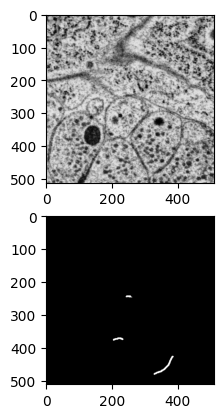

In [18]:
fig, ax = plt.subplots(2)
ax[0].imshow(tmp_img)
ax[1].imshow(tmp_mask)

In [72]:
import joblib
model = joblib.load("models/model1.pk1")

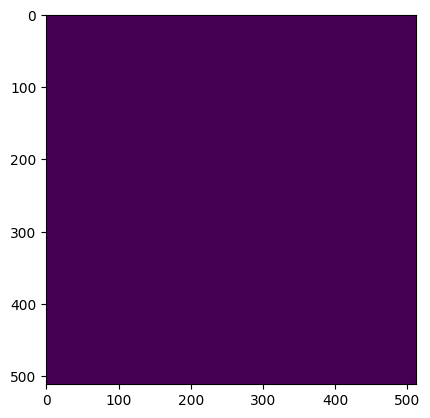

In [7]:
# try model
import torch
k = 20
tmp = masks[k]
tmp[tmp!=0] = 255
plt.imshow(tmp)
tmp_input = np.reshape(tmp[:, :, 0],(1,1,512,512))
res = model(torch.Tensor(tmp_input))
pred_mask_binary = np.argmax(res.squeeze(0).detach(), 0)
plt.imshow(pred_mask_binary)

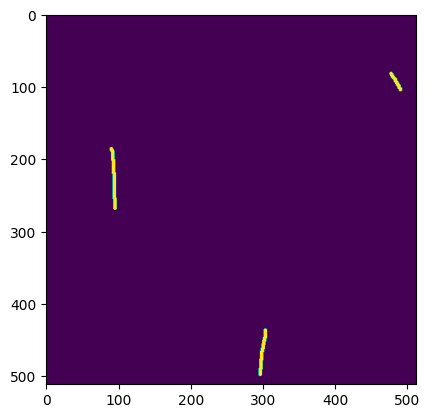

In [8]:
k = 200
tmp = masks[k][:, :, 0]
plt.imshow(tmp)

In [36]:
# have a numpy array (num of images, 512, 512, 3)
# (subset, 512, 512, 3)
num_imgs = len(imgs)
indices = np.arange(num_imgs)
np.random.shuffle(indices)
train_indices = indices[:int(0.6*num_imgs)]
valid_indices = indices[int(0.6*num_imgs):int(0.8*num_imgs)]
test_indices = indices[int(0.8*num_imgs):]
imgs = np.array(imgs)
masks = np.array(masks)

In [37]:
train_imgs = imgs[train_indices]
valid_imgs = imgs[valid_indices]
test_imgs = imgs[test_indices]

train_masks = masks[train_indices]
valid_masks = masks[valid_indices]
test_masks = masks[test_indices]

(512, 512)


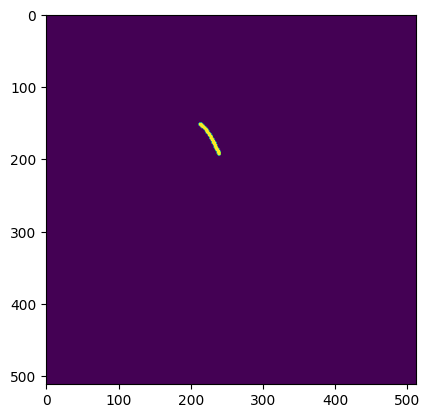

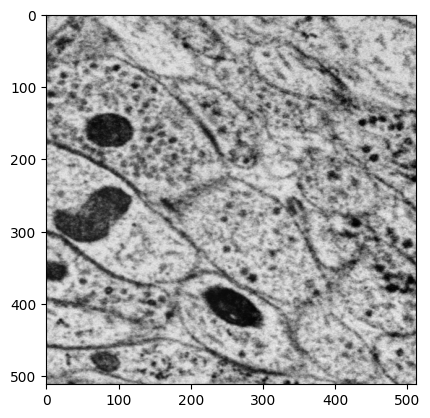

In [38]:
k = 20
tmp = train_masks[k][:, :, 0]
img = train_imgs[k]
print(tmp.shape)
plt.imshow(tmp)
plt.show()
plt.imshow(img)

In [39]:
plt.imsave(f"tmp.png",tmp)

In [40]:
print(train_masks.shape)

(214, 512, 512, 3)


In [41]:
for i,img in enumerate(train_imgs):
    cv2.imwrite(f"small_data/original/train/{i}.png", train_imgs[i])
    print(f"Saved train {i}")

for i,img in enumerate(valid_imgs):
    cv2.imwrite(f"small_data/original/valid/{i}.png", valid_imgs[i])
    print(f"Saved valid {i}")

for i,img in enumerate(test_imgs):
    cv2.imwrite(f"small_data/original/test/{i}.png", test_imgs[i])
    print(f"Saved test {i}")

Saved train 0
Saved train 1
Saved train 2
Saved train 3
Saved train 4
Saved train 5
Saved train 6
Saved train 7
Saved train 8
Saved train 9
Saved train 10
Saved train 11
Saved train 12
Saved train 13
Saved train 14
Saved train 15
Saved train 16
Saved train 17
Saved train 18
Saved train 19
Saved train 20
Saved train 21
Saved train 22
Saved train 23
Saved train 24
Saved train 25
Saved train 26
Saved train 27
Saved train 28
Saved train 29
Saved train 30
Saved train 31
Saved train 32
Saved train 33
Saved train 34
Saved train 35
Saved train 36
Saved train 37
Saved train 38
Saved train 39
Saved train 40
Saved train 41
Saved train 42
Saved train 43
Saved train 44
Saved train 45
Saved train 46
Saved train 47
Saved train 48
Saved train 49
Saved train 50
Saved train 51
Saved train 52
Saved train 53
Saved train 54
Saved train 55
Saved train 56
Saved train 57
Saved train 58
Saved train 59
Saved train 60
Saved train 61
Saved train 62
Saved train 63
Saved train 64
Saved train 65
Saved train 66
Saved

In [42]:
train_masks.shape

(214, 512, 512, 3)

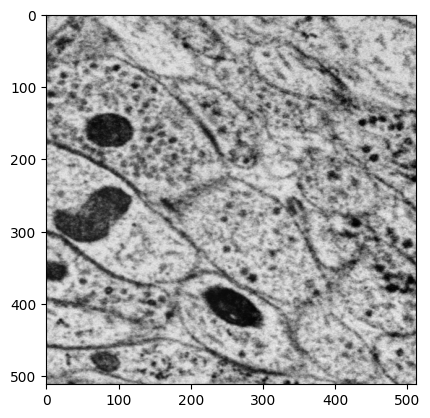

In [43]:
plt.imshow(train_masks[20][:, :, 1])
plt.imshow(train_imgs[20])

In [44]:
for i,img in enumerate(train_masks):
    plt.imsave(f"small_data/ground_truth/train/{i}.png", train_masks[i][:, :, 1])
    print(f"Saved train {i}")

for i,img in enumerate(valid_masks):
    plt.imsave(f"small_data/ground_truth/valid/{i}.png", valid_masks[i][:, :, 1])
    print(f"Saved valid {i}")

for i,img in enumerate(test_masks):
    plt.imsave(f"small_data/ground_truth/test/{i}.png", test_masks[i][:, :, 1])
    print(f"Saved test {i}")

Saved train 0
Saved train 1
Saved train 2
Saved train 3
Saved train 4
Saved train 5
Saved train 6
Saved train 7
Saved train 8
Saved train 9
Saved train 10
Saved train 11
Saved train 12
Saved train 13
Saved train 14
Saved train 15
Saved train 16
Saved train 17
Saved train 18
Saved train 19
Saved train 20
Saved train 21
Saved train 22
Saved train 23
Saved train 24
Saved train 25
Saved train 26
Saved train 27
Saved train 28
Saved train 29
Saved train 30
Saved train 31
Saved train 32
Saved train 33
Saved train 34
Saved train 35
Saved train 36
Saved train 37
Saved train 38
Saved train 39
Saved train 40
Saved train 41
Saved train 42
Saved train 43
Saved train 44
Saved train 45
Saved train 46
Saved train 47
Saved train 48
Saved train 49
Saved train 50
Saved train 51
Saved train 52
Saved train 53
Saved train 54
Saved train 55
Saved train 56
Saved train 57
Saved train 58
Saved train 59
Saved train 60
Saved train 61
Saved train 62
Saved train 63
Saved train 64
Saved train 65
Saved train 66
Saved